<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp7015/blob/main/comp7015_lab2_Machine_learning_basics_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Machine learning basics with scikit-learn

---

# Overview

In this lab, we would try out regression and classification in `sklearn`.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9pbmRleC5odG1s)

Let's install scikit-learn module with `pip` in our python environment.




In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data preparation

The most essential thing for machine learning is data. Let's prepare some data for go through the upcoming tasks.

## Loading data

There are various method to load dataset for `sklearn`. Let's take a look to different data loading methods. In following examples, we will load iris dataset from web or from `sklearn`.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9hdXRvX2V4YW1wbGVzL2RhdGFzZXRzL3Bsb3RfaXJpc19kYXRhc2V0Lmh0bWwjdGhlLWlyaXMtZGF0YXNldA==)

Iris is a species of flowering plants. The dataset consists of 

### Loading external data with `pandas`

`pandas` is a powerful library for working with data. It suppports analysis and manipulation on very large dataset. Thus, it provides functions for loading dataset in various format. Here is an example of reading CSV file (iris dataset) from web by using `read_csv(...)` function.

In [ ]:
import pandas as pd

iris = pd.read_csv('https://gist.githubusercontent.com/hkbu-kennycheng/97506c1a5ca5886adce001e8fb8f181b/raw/93f49b627d2c7d0d905820fa6efffd2fcab13dff/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`pd.read_csv` function would return an object of `pd.DataFrame`. It's one of a baisc unit in `pandas`. For each column in `DataFrame`, it's represented using `pd.Series` meaning a data series.

In fact, many common data file format are supported in this way like:

- `read_json(...)` for reading JSON file
- `read_excel(...)` for reading excel file

You may have a look to the functions by using `help(...)`.

```python
help(pd.read_json)
```

```python
help(pd.read_excel)
```

### Loading built-in dataset

There are various dataset built-in in `sklearn`.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9kYXRhc2V0cy90b3lfZGF0YXNldC5odG1sI3RveS1kYXRhc2V0cw==)

Let's try to load iris dataset with `datasets.load_iris(...)`. `return_X_y` is a boolean argument to tell whether we need a tuple of data and class labels or not. `as_frame` means returning as a `pd.DataFrame`.

In [ ]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


The data in `X` is same as previous `iris` DataFrame without the `species` column. It's the ground truth label for each record. As we set `return_X_y` to `True`, thus it would return it seperately in `y`.

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

The 3 label values are converted into integer already.

## Exploring data

After loading the dataset, it's good to take a look to the data. `.info()` would give us a summary of the DataFrame.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


As you could see that there are 150 entries in the DataFrame, with index `0` to `149`.

`.describe()` let us know statistical detial of each column in a DataFrame.

In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We may have an overview of data in pair-plot with `seaborn`.

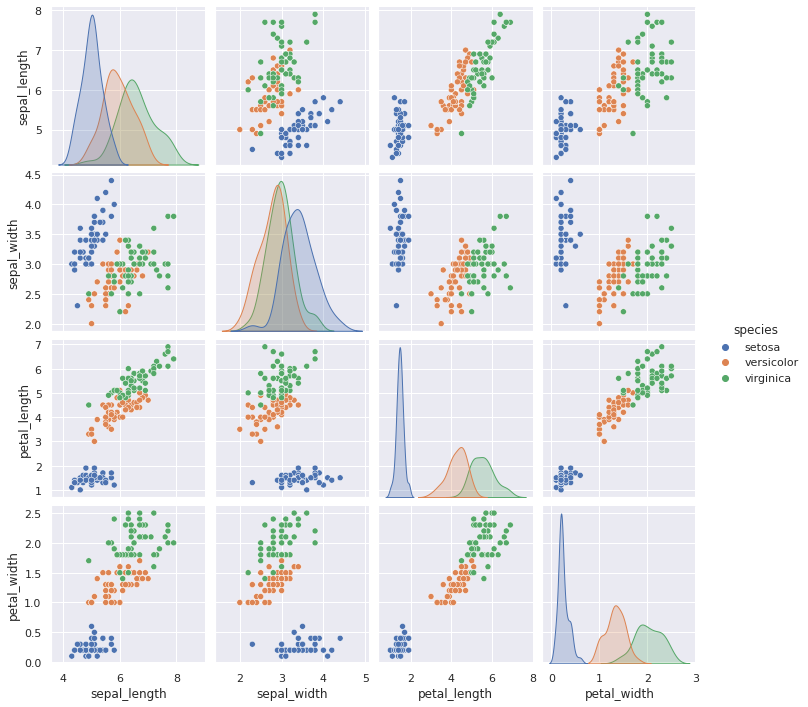

In [ ]:
import seaborn as sns

sns.pairplot(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']],
             hue="species", diag_kind="kde")

## Split train set and test set

Before fitting the data, it's great to split data into subset one for train and other for testing. Because we would like to know the estimation on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After spliting, we have 120 entries for training.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


And 30 entries for testing

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 73 to 30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   petal length (cm)  30 non-null     float64
 3   petal width (cm)   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


# Linear models

`sklearn` supports many linear models for estimation. We will take a look to `LinearRegression` and `LogisticRegression` in this section.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2xpbmVhcl9tb2RlbC5odG1s)

Math notation for a linear model: $\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$ ,where $\hat{y}$ is the predicted value. In `sklearn`, the vector $w = (w_1,
..., w_p)$ is in `.coef_` and `intercept_` is $w_0$

## Linear regression

Linear regression used to predict value based on estimation of training data.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLmxpbmVhcl9tb2RlbC5MaW5lYXJSZWdyZXNzaW9uLmh0bWwjc2tsZWFybi1saW5lYXItbW9kZWwtbGluZWFycmVncmVzc2lvbg==)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9254199044989622

Where `.score(...)` returns coefficient of determination of the pediction. Let's take a look to the function documentation.

In [ ]:
help(reg.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[-0.11633479 -0.05977785  0.25491375  0.54759598]
0.2525275898181468


### Make prediction with the estimation

To predict values with the estimation, we would use `.predict(input_data)` function. It would return the predicted value of `input_data`.

In [ ]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([ 1.23071715, -0.04010441,  2.21970287,  1.34966889,  1.28429336,
        0.02248402,  1.05726124,  1.82403704,  1.36824643,  1.06766437,
        1.70031437, -0.07357413, -0.15562919, -0.06569402, -0.02128628,
        1.39659966,  2.00022876,  1.04812731,  1.28102792,  1.97283506,
        0.03184612,  1.59830192,  0.09450931,  1.91807547,  1.83296682,
        1.87877315,  1.78781234,  2.03362373,  0.03594506,  0.02619043])

### Evaluate the estimation with matrix

To evaluation an estimation, we would have many diferent mertics. We would try mean squared error in the following example.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_test_pred)

0.03711379440797686

### Calculate accuracy by counting correct values

The truth value in iris dataset is 3 type of iris represented by a number. By this nature, we could turns the predicted value into class label value by rounding it. Let's see how it perform when using as a classifier.

Here we loop through the truth label and compare each with predicted value.

In [ ]:
correct = 0
for truth, pred in zip(y_test, y_test_pred):
  if truth - round(pred) == 0:
    correct += 1
print(correct / len(y_test))

1.0


## Logistic regression

Logistic regression is linear model for classification instead of regression.

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLmxpbmVhcl9tb2RlbC5Mb2dpc3RpY1JlZ3Jlc3Npb24uaHRtbCNza2xlYXJuLWxpbmVhci1tb2RlbC1sb2dpc3RpY3JlZ3Jlc3Npb24=)

In [ ]:
from sklearn.linear_model import LogisticRegression

cltreg = LogisticRegression(penalty='none', max_iter=1000)
cltreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [ ]:
print(cltreg.coef_)
print(cltreg.intercept_)

[[  4.36555584   9.93627424 -14.47047929  -6.85370664]
 [ -1.11594371  -1.53723192   3.07986769  -4.80347548]
 [ -3.24961213  -8.39904232  11.3906116   11.65718212]]
[  2.21223634  16.73044705 -18.94268339]


### Make prediction

`.predict` function in Logistic regression would output predicted class label value directly. Because of it's a classifier.

In [71]:
y_test_pred = cltreg.predict(X_test)
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Calculate accuracy

Previously, we compute accuracy by using loop. But actually `sklearn` provides `accuracy_score` function with the same logic.

In [72]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_test_pred)

1.0

### Model evaluation

In [76]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, y_test_pred, average='micro'))
print(recall_score(y_test, y_test_pred, average='macro'))

1.0
1.0


# Classification

## Decision tree

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLnRyZWUuRGVjaXNpb25UcmVlQ2xhc3NpZmllci5odG1sI3NrbGVhcm4tdHJlZS1kZWNpc2lvbnRyZWVjbGFzc2lmaWVy)

### Fitting data to model

We initialize `DecisionTreeClassifier` with `max_depth` set to 3, meaning that the maximum height of the tree is 4.

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Make prediction

Again, we would use `.predict()` to estimate the predicted values.

In [68]:
y_test_pred = dtc.predict(X_test)
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Calculate accuracy

Let's calculate accuracy of the decision tree model using data from testing set.

In [61]:
correct = 0
for truth, pred in zip(y_test, y_test_pred):
  if truth == pred:
    correct += 1
print(correct / len(y_test))

1.0


### Evaluate model with F1 score

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLm1ldHJpY3MuZjFfc2NvcmUuaHRtbCNza2xlYXJuLW1ldHJpY3MtZjEtc2NvcmU=)



In [77]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average='weighted')

1.0

### Plotting the tree

We could plot the decision tree graphically with `tree.plot_tree(...)`.

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

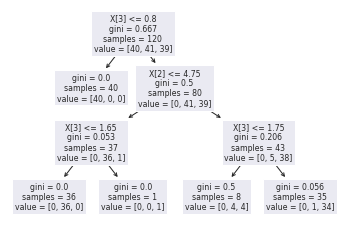

In [69]:
from sklearn import tree

tree.plot_tree(dtc)

## Random forest

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLmVuc2VtYmxlLlJhbmRvbUZvcmVzdENsYXNzaWZpZXIuaHRtbCNza2xlYXJuLWVuc2VtYmxlLXJhbmRvbWZvcmVzdGNsYXNzaWZpZXI=)

### Fitting data to model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

### Make prediction


In [62]:
y_test_pred = rf.predict(X_test)
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Calculate accuracy

In [63]:
correct = 0
for truth, pred in zip(y_test, y_test_pred):
  if truth == pred:
    correct += 1
print(correct / len(y_test))

1.0


### Evaluate 10-folds cross-validation

In [66]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf, X_test, y_test, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


array([1.        , 1.        , 0.66666667, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ])

### Plotting the tree

To plot the trees in `RandomForest`, we will need to loop through `.estimators_`.

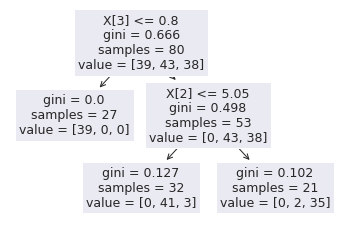

In [ ]:
for t in rf.estimators_:
  tree.plot_tree(t)